In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
left= df[df.left==1]
left.shape

(3571, 10)

In [4]:
there = df[df.left==0]
there.shape

(11428, 10)

In [5]:
df.groupby ('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# Impact of salary on employee retention

<AxesSubplot:xlabel='salary'>

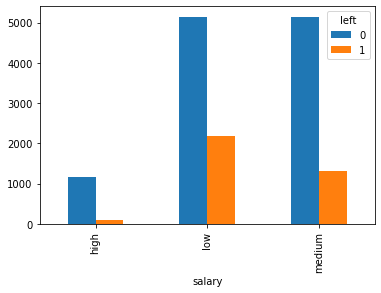

In [6]:
pd.crosstab(df['salary'],df['left']).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

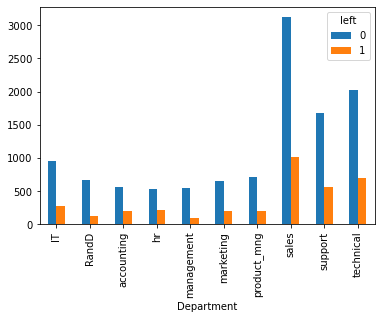

In [7]:
pd.crosstab(df['Department'],df['left']).plot(kind='bar')

<AxesSubplot:xlabel='promotion_last_5years'>

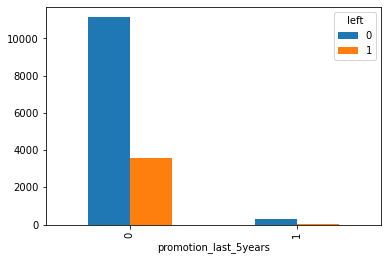

In [8]:
pd.crosstab(df['promotion_last_5years'],df['left']).plot(kind='bar')

<AxesSubplot:xlabel='Work_accident'>

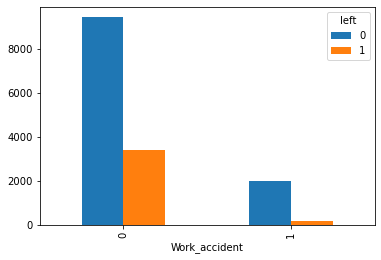

In [9]:
pd.crosstab(df['Work_accident'],df['left']).plot(kind='bar')

<AxesSubplot:xlabel='time_spend_company'>

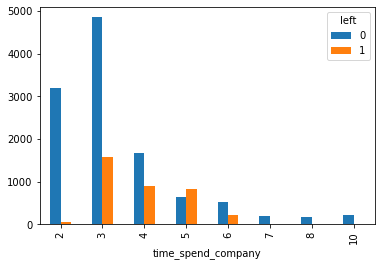

In [10]:
pd.crosstab(df['time_spend_company'],df['left']).plot(kind='bar')

<AxesSubplot:xlabel='average_montly_hours'>

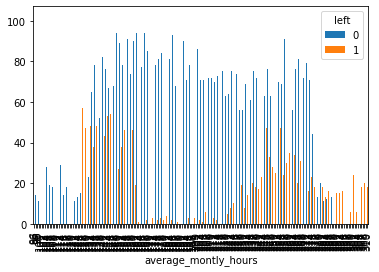

In [11]:
pd.crosstab(df['average_montly_hours'],df['left']).plot(kind='bar')

<AxesSubplot:xlabel='number_project'>

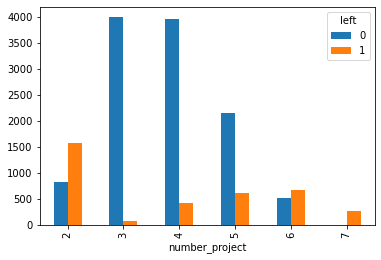

In [12]:
pd.crosstab(df['number_project'],df['left']).plot(kind='bar')

<AxesSubplot:xlabel='last_evaluation'>

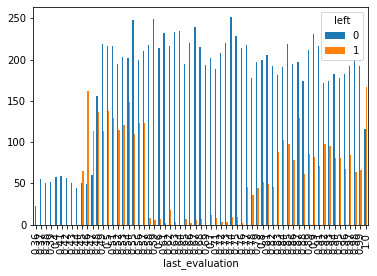

In [13]:
pd.crosstab(df['last_evaluation'],df['left']).plot(kind='bar')

<AxesSubplot:xlabel='satisfaction_level'>

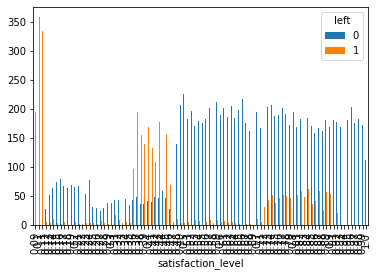

In [14]:
pd.crosstab(df['satisfaction_level'],df['left']).plot(kind='bar')

From the data analysis so far we can know that we will use following variables as independant variables in our model

In [15]:
datura = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
datura.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [16]:
# salary_dummies = pd.get_dummies(datura.salary,prefix='salary')

In [17]:
# df_with_dummies= pd.concat([datura,salary_dummies],axis='columns')

In [18]:
salary_dummies = pd.get_dummies(datura.salary)
salary_dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [19]:
ards = pd.concat([datura,salary_dummies],axis='columns')
ards

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [20]:
ards.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [21]:
ards.drop('salary',axis='columns',inplace=True)
ards.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [22]:
X = ards
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [23]:
y= df.left

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train ,y_test,= train_test_split(X,y,train_size = 0.3)

In [25]:
from sklearn.linear_model import LogisticRegression
tata = LogisticRegression()

In [26]:
tata.fit(X_train, y_train)

LogisticRegression()

In [27]:
tata.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

accureacy of the model

In [28]:
tata.score(X_test,y_test)

0.7699047619047619